# 1 - Regressão Linear com uma Variavel

## Caso Food truck

## 1.1 Visualização dos Dados

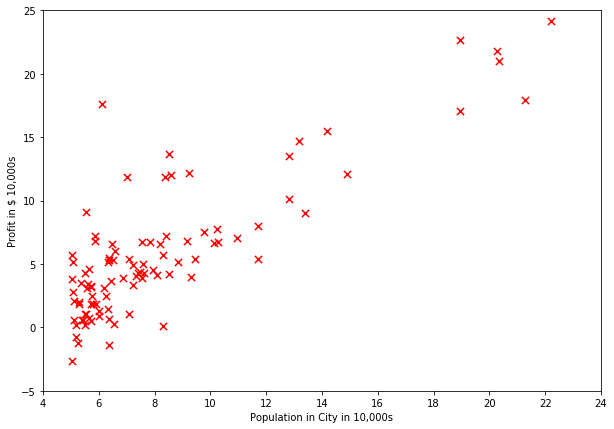

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

FOOD_TRUCK = "am-T1-dados"


def load_food_truck(food_truck=FOOD_TRUCK):
    os.makedirs(food_truck, exist_ok=True)
    txt_path = os.path.join(food_truck, "ex1data1.txt")
    return pd.read_csv(txt_path, sep=",", header=None, names=[ "Population in City in 10,000s","Profit in $ 10,000s"])


food_truck = load_food_truck()
food_truck.plot(kind="scatter", y="Profit in $ 10,000s", s=52, ylim=(-5, 25), xlim=(4, 24),
                xticks=np.arange(4, 25, 2), x="Population in City in 10,000s", marker='x', c='red', figsize=(10, 7))


## 1.2 Gradiente Descendente

#### Nessa parte é calculado a hipothesi para a regressão linear de uma variável:
#### A hipothesi é uma equação linear onde o x_s é o conjunto de dados e os thetas representam os parâmetros a serem ajustados
![text](img/hipothesi.png)

In [33]:
def hypotheses(theta0, theta1, x_s):
    return theta0 + (theta1 * x_s)

## É necessário fazer o calculo da função de custo

![title](img/custo_uni.png)

#### A funcão de custo informa o quanto o nossa hipothesi esta distante do valor de y que busca se prever

In [75]:
import numpy as np
import plot_ex1data1 as pe
import utils_ml as um
import math


def custo_regrlin(t0, t1, x, y):
    m = len(x)
    return 1/2/m * sum([math.pow((hypotheses(t0, t1, np.asarray([x[i]])) - y[i]), 2) for i in range(m)])



food_truck = load_food_truck()

x = food_truck['Profit in $ 10,000s']
y = food_truck['Population in City in 10,000s']

j_theta_0 = 0
j_theta_1 = 0
count = 0
new_custo = 0
custo = custo_regrlin(j_theta_0, j_theta_1, x, y)
custo


32.072733877455654

#### Calcula se  então  o gradiente descendente para cada parametro theta. A cada iteração um novo theta e colocado na função gradiente

#### Nessa parte é calculado novos valores de Theta em cada iteração:
#### O custo final é o ultimo custo da nossa função gradiente, o valor de iterações pode ser calibrado para obter se os #### melhores valores de j_theta_0 e j_theta_1. No decorrer do trabalho essa possibilidade será demonstrada

In [42]:
import numpy as np
import utils_ml as um
# import sklearn
# from sklearn.datasets.samples_generator import make_regression
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import custo_reglin_uni as cr


def gd_reglin_uni(x, y, learning_rate, iterations):
    j_theta_0 = 0
    j_theta_1 = 0
    m = len(x)
    count = 0
    new_custo = 0
    custo = custo_regrlin(j_theta_0, j_theta_1, x, y)

    while True:
        j_theta_0 = j_theta_0 - (learning_rate * (1/m *
                                                  sum([(hypotheses(j_theta_0, j_theta_1, np.asarray(
                                                      [x[i]]))) - y[i] for i in range(m)])))
        j_theta_1 = j_theta_1 - (learning_rate * (1/m *
                                                  sum([(hypotheses(j_theta_0, j_theta_1, np.asarray([x[i]])) - y[i]) * np.asarray([x[i]]) for i in range(m)])))

        new_custo = custo_regrlin(j_theta_0, j_theta_1, x, y)
        count += 1
        if(count > iterations):
            custo = new_custo
            break
    return custo, [j_theta_0, j_theta_1]



![title](img/thetas_uni.png)

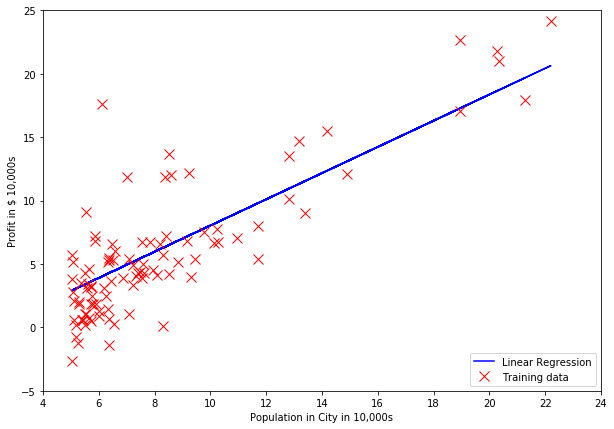

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import plot_ex1data1 as pe
import gd_reglin_uni as gd

def visualizar_reta():
    food_truck = load_food_truck()
    learning_rate = 0.01

    x = food_truck['Profit in $ 10,000s']
    y = food_truck['Population in City in 10,000s']

    custo, theta = gd_reglin_uni(x, y, learning_rate, 500)

    precision_value = theta[0] + theta[1]*x



    plt.figure(figsize=(10, 7))
    plt.plot(x, precision_value, 'b-', label="Linear Regression")
    plt.plot(x, y, 'r.', marker='x', markersize=10, label="Training data")
    plt.legend(loc=4)
    plt.ylabel("Profit in $ 10,000s", fontsize=10)
    plt.xlabel("Population in City in 10,000s", fontsize=10)
    plt.ylim(-5, 25)
    plt.xlim = (4, 24)
    plt.xticks(np.arange(4, 25, 2))
visualizar_reta()

#### A Funcão  de predicao recebe os thetas ideais  e calcular o valor baseado x (População) para predizer o y (Lucro) 

In [80]:

def predict_value(x, theta):
    return theta[0] + theta[1]*np.array([x])


food_truck = pe.load_food_truck()
learning_rate = 0.01

y = food_truck['Profit in $ 10,000s']
x = food_truck['Population in City in 10,000s']

custo, theta = gd.gd_reglin_uni(x, y, learning_rate, 500)

print("Para uma população de 35,000 habitantes , Preve um lucro de  {0}".format(
    float((predict_value(3.5, theta)*10000))))

print("Para uma população de 70,000 habitantes , Preve um lucro de  {0}".format(
    float((predict_value(7, theta)*10000))))



Para uma população de 35,000 habitantes , Preve um lucro de  13172.45306699129
Para uma população de 70,000 habitantes , Preve um lucro de  49318.477666550905


## Surface

Text(0.5, 0, 'theta1')

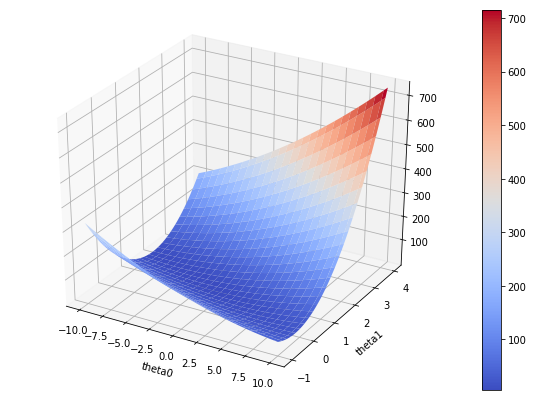

In [63]:
from matplotlib import cm

theta0 = np.linspace(-10, 10)
theta1 = np.linspace(-1, 4)

# Um incremento de 0,01 ´e utilizado para gerar os
# valores de θ0 e de θ1.
learning_rate = 0.01

j_ts = np.zeros((len(theta0), len(theta1)))

food_truck = load_food_truck()
x = food_truck['Profit in $ 10,000s']
y = food_truck['Population in City in 10,000s']

for ti0 in range(len(theta0)):
    for ti1 in range(len(theta1)):
        ts = [[theta0[ti0]], [theta1[ti1]]]
        j_ts[ti0,ti1] = custo_regrlin(theta0[ti0], theta1[ti1], x, y)

j_ts = np.transpose(j_ts)

fig = plt.figure(figsize=(10, 7))
ax = fig.gca(projection='3d')
theta0, theta1 = np.meshgrid(theta0, theta1)
surf = ax.plot_surface(theta0, theta1, j_ts, cmap=cm.coolwarm, rstride=2, cstride=2)
fig.colorbar(surf)
plt.xlabel('theta0')
plt.ylabel('theta1')

## Countour

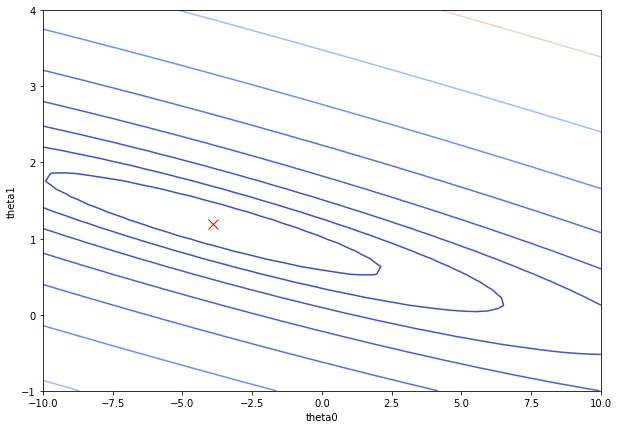

In [72]:
from matplotlib import cm

theta0 = np.linspace(-10, 10)
theta1 = np.linspace(-1, 4)

# Um incremento de 0,01 ´e utilizado para gerar os
# valores de θ0 e de θ1.
learning_rate = 0.01

j_ts = np.zeros((len(theta0), len(theta1)))

food_truck = pe.load_food_truck()
x = food_truck['Profit in $ 10,000s']
y = food_truck['Population in City in 10,000s']

for ti0 in range(len(theta0)):
    for ti1 in range(len(theta1)):
        ts = [[theta0[ti0]], [theta1[ti1]]]
        j_ts[ti0,ti1] = custo_regrlin(theta0[ti0], theta1[ti1], x, y)

j_ts = np.transpose(j_ts)

_,ideal_theta = gd.gd_reglin_uni(x, y, learning_rate, 5000)

plt.figure(figsize=(10, 7))
countour_plt = plt.contour(theta0, theta1, j_ts, np.logspace(-2, 3, 20), cmap=cm.coolwarm)
fig.colorbar(countour_plt)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(ideal_theta[0], ideal_theta[1], 'rx', markersize=10, linewidth=2)
plt.show()